# Exercise - 1

The goal of this exercise is to calculate and plot seasonal weather anomalies to see how temperatures have changed in different seasons over the past 100+ years. The data used for this exercise is the daily temperature data from the Sodankyla weather station of Northern Finland.


The modules which will be used for this exercise are `pandas` and `matplotlib`. Therefore, importing these necessary modules is the first step before we proceed further. We will be actually using a sub-package of `matplotlib` library called `pyplot`, so we will import only that.

> Note: This exercise can be done through different methods, we follow the below explained method to cover maximum functions of `pandas`  and `pyplot` libraries

In [1]:
#importing necessary modules

import pandas as pd
import matplotlib.pyplot as plt

---

# Task 1 - Reading, cleaning and preparing the data

To read the given [data](data/2315676.txt) from the **data** folder in the working directory we use the `pd.read_csv` function of the pandas library. 

In [2]:
fp = 'data/2315676.txt' #fp means filepath

#reading the data
data = pd.read_csv(fp, na_values = -9999, skiprows = [1], delim_whitespace = True)

- The `pd.read_csv` function requires the path of the file which we are trying to read, which we represented by **fp**.
- As the missing values are mentioned as `-9999` in this data, we specify that information to the function through the `na_values` argument.
- If we inspect the data in the raw format, we can observe that the first row has no information with just blank lines `-------`, so to remove that row from the data we specify that information to the function through the `skiprows=[1]` arugment.
- As the data is seperated by whitespaces unlike comma or other deliminators, we specify the information to the function through the `delim_whitespace = True)` argument to make the data read into a data frame (table format)

Now, inspect the data to understand the rows, columns, data and the structure

In [3]:
data

,STATION,STATION_NAME,DATE,TAVG,TMAX,TMIN
0,GHCND:FI000007501,SODANKYLA-AWS-FI,19080101,NaN,2.0,-37.0
1,GHCND:FI000007501,SODANKYLA-AWS-FI,19080102,NaN,6.0,-26.0
2,GHCND:FI000007501,SODANKYLA-AWS-FI,19080103,NaN,7.0,-27.0
3,GHCND:FI000007501,SODANKYLA-AWS-FI,19080104,NaN,-3.0,-27.0
4,GHCND:FI000007501,SODANKYLA-AWS-FI,19080105,NaN,4.0,-36.0
...,...,...,...,...,...,...
41060,GHCND:FI000007501,SODANKYLA-AWS-FI,20201003,47.0,51.0,NaN
41061,GHCND:FI000007501,SODANKYLA-AWS-FI,20201004,43.0,47.0,37.0
41062,GHCND:FI000007501,SODANKYLA-AWS-FI,20201005,42.0,NaN,37.0
41063,GHCND:FI000007501,SODANKYLA-AWS-FI,20201006,45.0,46.0,43.0


We can see the data has **41065** records with **6** columns.

Use the `DataFrame.describe()` function to better understand your data

In [4]:
#descriptive statistics of the data
data.describe()

,DATE,TAVG,TMAX,TMIN
count,4.106500e+04,21222.000000,40296.000000,39119.000000
mean,1.963960e+07,31.696211,39.034296,22.315985
std,3.253620e+05,20.809623,20.905912,22.187090
min,1.908010e+07,-53.000000,-47.000000,-57.000000
25%,1.936030e+07,19.000000,26.000000,9.000000
50%,1.964061e+07,33.000000,38.000000,27.000000
75%,1.992072e+07,48.000000,55.000000,39.000000
max,2.020101e+07,78.000000,90.000000,67.000000


From the above statistics, we can observe that there are only **21222** records for the `TAVG` column, but there are significantly more records for the `TMAX` and `TMIN` columns. Therefore, we can use these max and min columns data to calculate an estimated average temperature for those records which are missing `TAVG` value.

We create a new function named `estimates` that caluculates the estimated average temperatures.

In [5]:
#function to calculate the average temperature data from max and min values
def estimates(df):
    if pd.isnull(df.TAVG): # if TAVG is missing, then only the function calculates the average value of max and min value.
        return (df.TMAX + df.TMIN)/2
    else:
        return df.TAVG

Now, we use the above function to find the estimated average temperatures and add it to our data frame `data` using the `apply` function of pandas.

We a create a new column labelled `TAVG_EST` to record our new estimated average temperatures so that we do not mess with original data.

In [6]:
#adding the estimated average daily temperatures to a new column
data['TAVG_EST'] = data.apply(estimates, axis = 'columns')

The `apply` function takes the argument of:

- what function we are passing the data frame data through : `estimates` function.
- through which axis we are passing this function through : `columns` in this case as `TAVG`, `TMAX` & `TMIN` are column labels.

In [7]:
#dropping the missing values in estimated average temperature data column
data.dropna(subset=['TAVG_EST'], inplace=True)

Before we proceed further, we can remove the records which still have missing values for the average temperature using the `DataFrame.dropna()` function.

We can specify to the function about which column it should look through for missing values using the `subset` argument. The argument `inplace= True` drops the missing values and rewrites the existing data frame.

In [8]:
data.describe()

,DATE,TAVG,TMAX,TMIN,TAVG_EST
count,4.088200e+04,21222.000000,40206.000000,39026.000000,40882.000000
mean,1.964191e+07,31.696211,39.054271,22.353098,30.878675
std,3.242160e+05,20.809623,20.916017,22.170767,20.910897
min,1.908010e+07,-53.000000,-47.000000,-57.000000,-53.000000
25%,1.936072e+07,19.000000,26.000000,9.000000,17.500000
50%,1.964091e+07,33.000000,38.000000,27.000000,32.500000
75%,1.992090e+07,48.000000,55.000000,39.000000,47.000000
max,2.020101e+07,78.000000,90.000000,67.000000,78.000000


Now, we can observe that the estimated average daily temperature (`TAVG_EST`) has values for **40882** records which is way higher from the original average daily temperature records (`TAVG`) which was **21222**. We have more data to work with now!

---

# Task 2 - Convering temperatures from fahranheit to celsius

The next step is to convert the temepratures to celsius as the data has them in fahranheit. We can do this by defining a function that converts temperature values from fahranheit to celsisu and pass it through our data average daily temperature column.

Formula for converting fahranheit temperatures to celsius is **TEMP_C = (TEMP_F - 32) / (1.8)**

We have two choices here, we can either define a funciton here or we can call a function from a python library. As we already defined a function above in Task-1, lets call a function now!

You can observe a python file named `temp_converter.py` in your working directory which has all the functions that are required to convert temperatures from one type to the other.

In [9]:
#import the custom python library
import temp_converter as tc

Now, lets find the average daily temperature in celsius and save it into a new column labelled `TAVG_C`

In [10]:
# converting temp in fahranheit to celsius
data['TAVG_C'] = tc.fahr_to_celsius(data['TAVG_EST'])

`fahr_to_celsius` is one of the function of `temp_converter` custom python script

Using the `DataFrame.describe()` function, check how the descriptive statistics of data are looking now with the new variable `TAVG_C`

In [11]:
data.describe()

,DATE,TAVG,TMAX,TMIN,TAVG_EST,TAVG_C
count,4.088200e+04,21222.000000,40206.000000,39026.000000,40882.000000,40882.000000
mean,1.964191e+07,31.696211,39.054271,22.353098,30.878675,-0.622958
std,3.242160e+05,20.809623,20.916017,22.170767,20.910897,11.617165
min,1.908010e+07,-53.000000,-47.000000,-57.000000,-53.000000,-47.222222
25%,1.936072e+07,19.000000,26.000000,9.000000,17.500000,-8.055556
50%,1.964091e+07,33.000000,38.000000,27.000000,32.500000,0.277778
75%,1.992090e+07,48.000000,55.000000,39.000000,47.000000,8.333333
max,2.020101e+07,78.000000,90.000000,67.000000,78.000000,25.555556


---

# Task 3 - Calculating seasonal average temperature 

## Task 3.1 - Parsing `DATE` information 

For calculating the seasonal average temperatures, we need to group the data by seasons for each year. So, first we need to prepare our `year`, `month` and if necessary `YRMO` (year & month combined) data. We do this by parsing the information from the `DATE` column.

First, we check what type of data we have our data frame using the function `DataFrame.dtypes`

In [12]:
data.dtypes

STATION          object
STATION_NAME     object
DATE              int64
TAVG            float64
TMAX            float64
TMIN            float64
TAVG_EST        float64
TAVG_C          float64
dtype: object

From above information, we know that the `DATE` data type is an integer. But, we can parse information from a string data. So, the next step is to convert `DATE` data from **int64** type to **str** type. 

In [13]:
#converting DATA column from integer to string data type
data['date_str'] = data['DATE'].astype(str)

Above, we used the pandas function `.astype()` to convert the value from integer type to string type. We need to specifity the function 

- which column we want to pass this function through: here it is the `DATE` column
- into what data type we want to change it to: mentioned as `str` implying string. (`int` for integer, `float` for float number)

We created a new column labelled `date_str` in the data to store this converted data type.

Check the data types of the data frame now using the `DataFrame.dtypes` function

In [14]:
data.dtypes

STATION          object
STATION_NAME     object
DATE              int64
TAVG            float64
TMAX            float64
TMIN            float64
TAVG_EST        float64
TAVG_C          float64
date_str         object
dtype: object

We can see tha the column `date_str` is not an integer or float, it is an object (string). So, now we can proceed with parsing it

We parse the date information from `date_str` into three new columns:

1. `YRMO` : combination of year and month from `date_str` column data (we will use this later down the exercise). It is the first 6 positions in the `date_str` values. 

```
index = [0,5]
```
            
2. `year` : the year informaiton from `date_str` column data. It is the first 4 positions in the `date_str` values.

```
index = [0,3]
```
            
3. `month` : the month information from `date_str` column data. It is the 5th and 6th position in the `date_str` values.
            
```
index = [4,5]
```
            


In [15]:
#parsing YRMO value from date information 
data['YRMO'] = data['date_str'].str.slice(start=0,stop=6)
data['YRMO'] = data['YRMO'].astype(int) #converting the data back into integer type to use pandas numerical functions

#parsing year value from date information
data['year'] = data['date_str'].str.slice(start=0, stop=4)
data['year'] = data['year'].astype(int) #converting the data back into integer type to use pandas numerical functions

#parsing month value from date information
data['month'] = data['date_str'].str.slice(start=4, stop=6)
data['month'] = data['month'].astype(int) #converting the data back into integer type to use pandas numerical functions

We parsed the information into the new columns using the pandas function `.str.slice`. We can use this function only for string data types as indicated by **str** in the function name itself. We need to specify the function:

- what column from the data frame are we parsing: here it is the `date_str` column 
- what data we want to prase the selecting column data using `start` and `stop` arguments. These are indices.

After parsing the necessary information from `date_str` column into new columns, we convert back the data type of new columns into integer to utilize the pandas numerical functions. 

**Now that we have our year, month, YRMO information we proceed to caluculate the seasonal average temperatures**

## Task 3.2 - Calculating seasonal average temperature for the period of 1909 - 2019

To calculate the seasonal average temperature we first need to group the data into the four seasons described.

- **Winter**: December, January, Febraury
```
month = [12, 1, 2]
```
- **Spring**: March, April, May
```
month = [3, 4, 5]
```
- **Summer**: June, July, August
```
month = [6, 7, 8]
```
- **Autumn**: September, October, November
```
month = [9, 10, 11]
```

Lets create new data frames for each of the 4 seasons:

1. `winter_data` 

2. `spring_data`

3. `summer_data`

4. `autumn_data`

We use the pandas function `.loc` to collect the selected months information for each season. 

In [16]:
#creating new data frame for each of the 4 seasons
winter_data = data[['TAVG_C', 'YRMO', 'year','month']].loc[(data.month ==12) | (data.month ==1) | (data.month ==2)]
spring_data = data[['TAVG_C', 'YRMO', 'year','month']].loc[(data.month ==3) | (data.month ==4) | (data.month ==5)]
summer_data = data[['TAVG_C', 'YRMO', 'year','month']].loc[(data.month ==6) | (data.month ==7) | (data.month ==8)]
autumn_data = data[['TAVG_C', 'YRMO', 'year','month']].loc[(data.month ==9) | (data.month ==10) | (data.month ==11)]

We specify the following information to the `.loc` function:

- what information (columns) we need from the origin data frame which is `['TAVG_C', 'YRMO', 'year','month']` for our case. We took average temperature (celsius), YRMO, year and month data from the origin data frame.

- how to filter the data that we needed which is mentioned by (`|` indicates `or` operator):

    - `(data.month ==12) | (data.month ==1) | (data.month ==2)` for winter data
    - `(data.month ==3) | (data.month ==4) | (data.month ==5)` for spring data
    - `(data.month ==6) | (data.month ==7) | (data.month ==8)` for summer data
    - `(data.month ==9) | (data.month ==10) | (data.month ==11)` for autumn data
    
Now, lets take the spring_data and see how the data looks!

In [17]:
spring_data

,TAVG_C,YRMO,year,month
60,-4.722222,190803,1908,3
61,-6.944444,190803,1908,3
63,-8.888889,190803,1908,3
64,-12.777778,190803,1908,3
65,-3.333333,190803,1908,3
...,...,...,...,...
40932,10.555556,202005,2020,5
40933,9.444444,202005,2020,5
40934,8.333333,202005,2020,5
40935,8.888889,202005,2020,5


We can observe that these data have information from the years 1908 and 2020 as well. But, we do not need them as we want to find the seasonal average temperatures for the period 1909 - 2019. So, now we remove these records which are from 1908 or 2020.

**Caution**: we remove all the data from years 1908 and 2020 from spring, summer and autumn data frames but not winter data frame. The reason is explained below

In [18]:
#removing data from 1908 and 2020 for spring, summer and autumn data frames
spring_data = spring_data.loc[(spring_data.year > 1908) & (spring_data.year < 2020)]
summer_data = summer_data.loc[(summer_data.year > 1908) & (summer_data.year < 2020)]
autumn_data = autumn_data.loc[(autumn_data.year > 1908) & (autumn_data.year < 2020)]

We use the same pandas function `.loc` here as well but this we used a `&` (and) operator to make sure our seasoned data frames do not have any records from the year 1908 or 2020.

We exculded `winter_data` from the above step because, winter season of a particular year needs information for the december month of previous year. For example:

```
Winter 1909 : December 1908 + January 1909 + Febraury 1909

Winer 1910 : December 1909 + January 1910 + Febraury 1910
.
.
.
Winter 2019 : December 2018 + January 2019 + Febraury 2019
```

So, from above explanation we can understand that we do not need 2020 year information at all but we need December 1908 information. Lets update our `winter_data` by removing information from 2020.

In [19]:
#removing 2020 information from winter_data
winter_data = winter_data.loc[winter_data.year != 2020]

The operator `!=` means **not equal to**. So, we have excluded the data from the year 2020 in our `winter_data`. 

In case of `winter_data` we use the `YRMO` column data to help us group into respecitve seasonal years i.e. 

```
Winter 1909 Winter 1910 Winter 1911 ........ Winter 2019
```

Lets observe the `YRMO` data to get a better understand of how to use it

In [20]:
winter_data

,TAVG_C,YRMO,year,month
0,-27.500000,190801,1908,1
1,-23.333333,190801,1908,1
2,-23.333333,190801,1908,1
3,-26.111111,190801,1908,1
4,-26.666667,190801,1908,1
...,...,...,...,...
40780,-19.444444,201912,2019,12
40781,-8.333333,201912,2019,12
40782,-0.555556,201912,2019,12
40783,-1.666667,201912,2019,12


As we can see there are many columns for every `YRMO` format (ex: many records for 190801), lets aggregate the data for each `YRMO` value. 

Lets load the new grouped data based on `YRMO` value into `group1` which is a series.

In [21]:
#grouping data by YRMO value
group1 = winter_data['TAVG_C'].groupby(winter_data['YRMO']).mean()

We aggregate the data using the pandas function `groupby`. We specify the following information to the function:

- what data frame we are looking into to aggregate the data : `winter_data`

- which information we want to aggregate from origin data fram : `['TAVG_C']`

- by which label (column) are we aggregating the values : `['YRMO']` coumn from `winter_data` data frame

- what type of aggregator we want to use : `mean()` as we want to calculate the average temperatures

Lets now, observe our group1 series data

In [22]:
group1

YRMO
190801   -14.674330
190802   -14.897119
190812    -7.903226
190901    -8.304598
190902   -14.743590
            ...    
201802   -14.920635
201812    -8.440860
201901   -16.845878
201902   -11.765873
201912    -5.609319
Name: TAVG_C, Length: 336, dtype: float64

From above, we can observe that there are values for `190801`, `190802` and `201912` combinations which we dont require. So lets remove them using the `drop` function of pandas.

In [23]:
#removing the uncessary data 
group1 = group1.drop(labels=[190801, 190802, 201912])

For the `drop` function we specify the following information:

- in what data frame /series we want to remove the values from : here it is `group1` pandas series

- on what basis we want to remove the values. as `group1` is a pandas series, we mention `labels` indicating the index values.

Now, once again look at the data!

In [24]:
group1

YRMO
190812    -7.903226
190901    -8.304598
190902   -14.743590
190912   -12.072650
191001   -12.204861
            ...    
201801   -11.630824
201802   -14.920635
201812    -8.440860
201901   -16.845878
201902   -11.765873
Name: TAVG_C, Length: 333, dtype: float64

It is much better now! We have only data that is required for us to group into winter seasons of different years. If you observe closely we can find a pattern. Every three consequtive rows belong to winter season of one year. 

The first three rows belong to winter of 1909, the next three belong to 1910 and so on. The last three belong to 2019.

So, lets create a new column and add this information to the data so that we can aggregate based on that information.

But first, we need to realize that we can add columns to a pandas series, so we convert it into a pandas data frame.

In [25]:
#converting pandas series to a pandas data frame
group2 = group1.to_frame()

We use the pandas function `.to_frame()` to conver the pandas series `group1` into a pandas data frame and stored it in `group2`.

Now, lets create a list where every three consecutive values are same starting from 1909 and ending with 2019.

In [26]:
#creating a list that has same values for every three consequtive positions
year_list = []
for i in range(1909, 2020):
    year_list = year_list + [i,i,i]

We created a list labelled `year_list` to store the values. Using a `for` loop we generated a list with same three values and added it to the `year_list`.

Lets have a look at the `year_list` to see what we created.

In [27]:
#year_list

Now, lets add this list to our data frame `group2` labelled as `year`

In [28]:
#instering the list to group2 pandas data frame
group2.insert(1, 'year', year_list)

We use the pandas function `DataFrame.insert` to add our list values as a column to the `group2` data frame. We specify the following information:

- what position we want to insert the list as a column : `1` for our case

- what we want to label the new column as : `year` 

- which list we want to add the data frame : `year_list`

**Now, we have all our seasons data ready, so lets group them for each year to know the seasonal average temperature.**

In [29]:
#grouping seasonal temperatures by year using the mean aggregate
spring_grouped = spring_data['TAVG_C'].groupby(spring_data['year']).mean()
summer_grouped = summer_data['TAVG_C'].groupby(summer_data['year']).mean()
autumn_grouped = autumn_data['TAVG_C'].groupby(autumn_data['year']).mean()
winter_grouped = group2['TAVG_C'].groupby(group2['year']).mean()

We use the `groupby` function to aggregate the values based on `year`. As we need average values we use the function `.mean()` function.

We have all our seasonal average temperatures ready for every year of the time period 1909 - 2019

---

# Task 4 - Calculate seasonal average temperature for the reference period

To know the seasonal temperature anamoly, we need to have a baseline temperature which is average seasonal temperature from a reference period. For our example the reference period is 1951 - 1980.

So, lets repeat the same process as above tasks but for the subset data to know the average seasonal temperature for the reference period.

In [30]:
#selecting the months for each season
ref_winter_data = data[['TAVG_C', 'YRMO', 'year','month']].loc[(data.month ==12) | (data.month ==1) | (data.month ==2)]
ref_spring_data = data[['TAVG_C', 'YRMO', 'year','month']].loc[(data.month ==3) | (data.month ==4) | (data.month ==5)]
ref_summer_data = data[['TAVG_C', 'YRMO', 'year','month']].loc[(data.month ==6) | (data.month ==7) | (data.month ==8)]
ref_autumn_data = data[['TAVG_C', 'YRMO', 'year','month']].loc[(data.month ==9) | (data.month ==10) | (data.month ==11)]

It is the same task which we performed in Task 3.2. 

Now, lets choose the data only from our reference period i.e. 1951 - 1980

In [31]:
#subsetting our reference data
ref_winter_data = ref_winter_data.loc[(ref_winter_data.year > 1949) & (ref_winter_data.year < 1981)]
ref_spring_data = ref_spring_data.loc[(ref_spring_data.year > 1950) & (ref_spring_data.year < 1981)]
ref_summer_data = ref_summer_data.loc[(ref_summer_data.year > 1950) & (ref_summer_data.year < 1981)]
ref_autumn_data = ref_autumn_data.loc[(ref_autumn_data.year > 1950) & (ref_autumn_data.year < 1981)]

**Note**: The `ref_winter_data` includes the information of 1950 as well because we need the December 1950 temperature to calculate the Winter 1951 average temperature.

Lets proceed with the same steps as Task 3.2, to prepare the winter season temperature for our reference year period.

In [32]:
#preparing the reference period winter data
group3 = ref_winter_data['TAVG_C'].groupby(ref_winter_data['YRMO']).mean()
group3 = group3.drop(labels=[195001, 195002, 198012])
group4 = group3.to_frame()

ref_year_list = []
for i in range(1951, 1981):
    ref_year_list = ref_year_list + [i,i,i]
    
group4.insert(1, 'year', ref_year_list)

Now, lets find group the data to know the average seasonal temperature for each year of refrence period.

In [33]:
#grouping seasonal temperatures by year using mean aggregate for the reference period
ref_spring_grouped = ref_spring_data['TAVG_C'].groupby(ref_spring_data['year']).mean()
ref_summer_grouped = ref_summer_data['TAVG_C'].groupby(ref_summer_data['year']).mean()
ref_autumn_grouped = ref_autumn_data['TAVG_C'].groupby(ref_autumn_data['year']).mean()
ref_winter_grouped = group4['TAVG_C'].groupby(group4['year']).mean()

We have average seasonal temperatures for each year, but we need only value for each season to find the temperature anamolies, so we take the average value for each season using the below code.

In [34]:
#finding average seasonal temperature for the reference period for each of the season
winter_temp = ref_winter_grouped.mean()
summer_temp = ref_summer_grouped.mean()
spring_temp = ref_spring_grouped.mean()
autumn_temp = ref_autumn_grouped.mean()

Now, we have average seasonal temperature for each year for the reference period: we have baseline temperature. Lets proceed to find the seasonal temperature anamolies.

---

# Task 5 - Caluculating seasonal temperature anamolies

As the temperature anamoly is the difference between observed temperature and the baseline temperature, we just peform a simple mathematical operation. 

In [35]:
#finding temperature anaomlies for each season for all the years in the period 1909 - 2019
winter_grouped = winter_grouped - winter_temp
summer_grouped = summer_grouped - summer_temp
spring_grouped = spring_grouped - spring_temp
autumn_grouped = autumn_grouped - autumn_temp

Now, we have the temperature anamolies data for each of the year in the period 1909 - 2019 for each season. We can proceed to plot these information using the `matplotlib.pyplot` library.

---

# Task 6 - Plotting seasonal temperature anamolies

As we have our necessary data ready, we can make the seasonal temperature anamolies subplots. 

First lets create empty subplots using the function `plt.subplots`. We specifity the following information:

- `nrows` - indicating how many rows of plots we need.

- `ncols` - indicating how columns of plots we need.

- `figsize` - indicating the size of the plot

- `axs` - refers to axes

The `axs[0][1]` indicates the plot in first row and first column, `axs[0][1]` indicates the plot in first row and second column and so on.

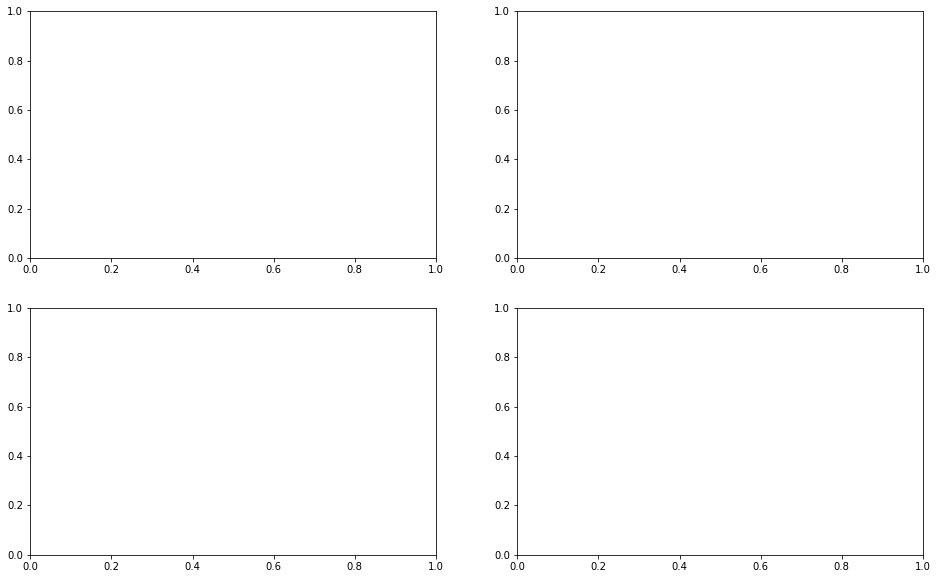

In [36]:
#creating empty plots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,10));
axs

#renaming plots axes for ease of use
ax11 = axs[0][0]
ax12 = axs[0][1]
ax21 = axs[1][0]
ax22 = axs[1][1]

Lets set the y-axis limits so that all four subplots are plotted against same y-axis making it easy to compare and visualize. 

In [37]:
# Find lower limit for y-axis
min_temp = min(winter_grouped.min(), spring_grouped.min(), summer_grouped.min(), autumn_grouped.min())
min_temp = min_temp - 5.0

# Find upper limit for y-axis
max_temp = max(winter_grouped.max(), spring_grouped.max(), summer_grouped.max(), autumn_grouped.max())
max_temp = max_temp + 5.0

Now, lets set a line-width and fill the subplots with our information. We will fill the subplots with our information using the function `.plot()` of pyplot library of matplotlib module. 

**The various information which we specify to the function `.plot()` are:**

- indicating in which of the four subplots to fill the data: `ax` argument.

- indicating the color: `c` argument.

- indicating the line width: `lw` argument.

- indicating the style of the plot: `style` argument.

- indicating the y-axis limits: `ylim` argument.

- indicating where are not we want the grids to be displayed in our plot: `grid` argument.

**Improving the anatomy of the plot**

1. To set the title of the plot we use the `fig.suptitle` function where we can also mention the size of the text using the `size` parameter.

2. Rotating the x-axis labels using the function `plt.setp()` function indicating the rotation we want using the `rotation` argument.

3. Setting the axis labels for all the 4 subplots using the `axs.set_xlabel()` and `axs.set_ylabel()` function.

4. Displaying text on the plots using the `axs.text()` function which requires the position of the our text and text itself.

5. To eliminate white spaces between different elements of the plot, we use the function `fig.tight_layout()`.

6. We can save the plot into either png (or) jpeg (or) pdf using the function `plt.savefig('name')`. 

    1. If we want to save in png format: `name.png`
    2. If we want to save in jpeg format: `name.jpeg`
    3. If we want to save in pdf format: 'name.pdf', dpi = 600 / 800 / 1500 (higher the number more the quality

In [45]:
# Set plot line width
line_width = 1.5

# Plot data
winter_grouped.plot(ax=ax11, c='blue', lw=line_width, style = 'ro-', 
                  ylim=[min_temp, max_temp], grid=True)
spring_grouped.plot(ax=ax12, c='orange', lw=line_width, style = 'ro-',
                  ylim=[min_temp, max_temp], grid=True)
summer_grouped.plot(ax=ax21, c='red', lw=line_width, style = 'ro-',
                  ylim=[min_temp, max_temp], grid=True)
autumn_grouped.plot(ax=ax22, c='brown', lw=line_width, style = 'ro-',
                  ylim=[min_temp, max_temp], grid=True)

# Set figure title
fig.suptitle('1909 - 2019 Seasonal Temperature Anamolies - Sodankyala', size = 20)

# Rotate the x-axis labels so they don't overlap
plt.setp(ax11.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax12.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax21.xaxis.get_majorticklabels(), rotation=20)
plt.setp(ax22.xaxis.get_majorticklabels(), rotation=20)

# Axis labels
ax21.set_xlabel('Year', size = 15)
ax22.set_xlabel('Year', size = 15)
ax11.set_ylabel('Temperature Anamoly [°C]', size = 15)
ax11.set_xlabel("")
ax12.set_xlabel("")
ax21.set_ylabel('Temperature Anamoly[°C]', size = 15)

# Season label text
ax11.text(2005, -7.5, 'Winter', size = 15)
ax12.text(2005, -7.5, 'Spring', size = 15)
ax21.text(2004, -7.5, 'Summer', size = 15)
ax22.text(2005, -7.5, 'Autumn', size = 15)

fig.tight_layout()

fig
plt.savefig('temp_anom.pdf', dpi=600)

<Figure size 432x288 with 0 Axes>